# Curso IBM Badge - Machine Learning Using Python

## Victor Hugo Negrisoli - Desenvolvedor Full-Stack Pleno & Analista de Dados

## Aprendizado Supervisionado - Regressão Linear Simples e Múltipla

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

### Lendo e descrevendo o conjunto de dados

In [23]:
dados = pd.read_csv('dados/FuelConsumptionCo2.csv')
dados.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
dados.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Reduzindo o modelo de dados apenas para os dados que queremos utilizar

In [25]:
dados_previsao = dados[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
dados_previsao.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Plotando visualizações para explorar os dados

In [34]:
# Essa função irá configurar a matplotlib para sempre plotar com o show(), removendo as mensagens de back-end do Pandas
# e irá sempre definir o tamanho da imagem

def configurar_plot(titulo, x, y, altura, largura):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(altura, largura)
    plt.show()

#### Iremos plotar um histograma com todas as colunas disponíveis

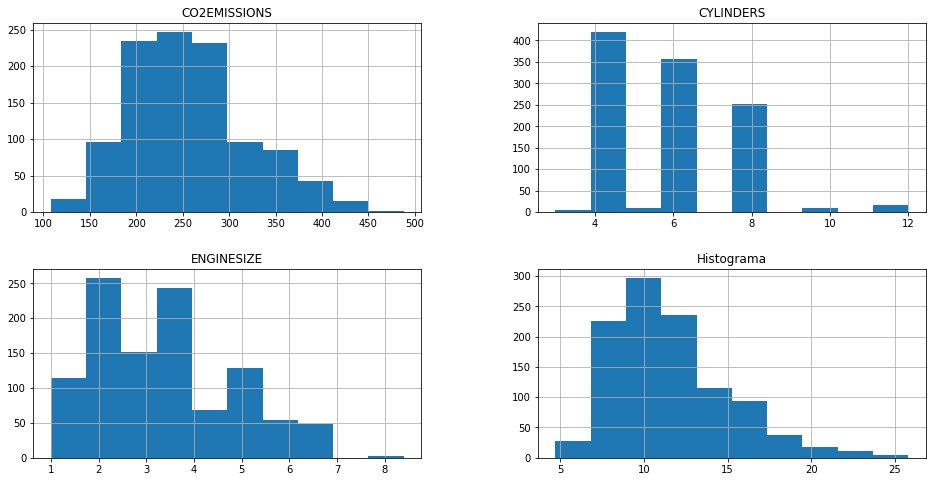

In [75]:
dados_previsao[['CYLINDERS',
                'ENGINESIZE',
                'CO2EMISSIONS',
                'FUELCONSUMPTION_COMB']
              ].hist()

configurar_plot(
    'Histograma',
    '',
    '',
    16,
    8
)

#### Iremos plotar um scatter (dispersão) com as colunas de consumo de combustível , tamanho do motor e cilindro por emissão de CO2

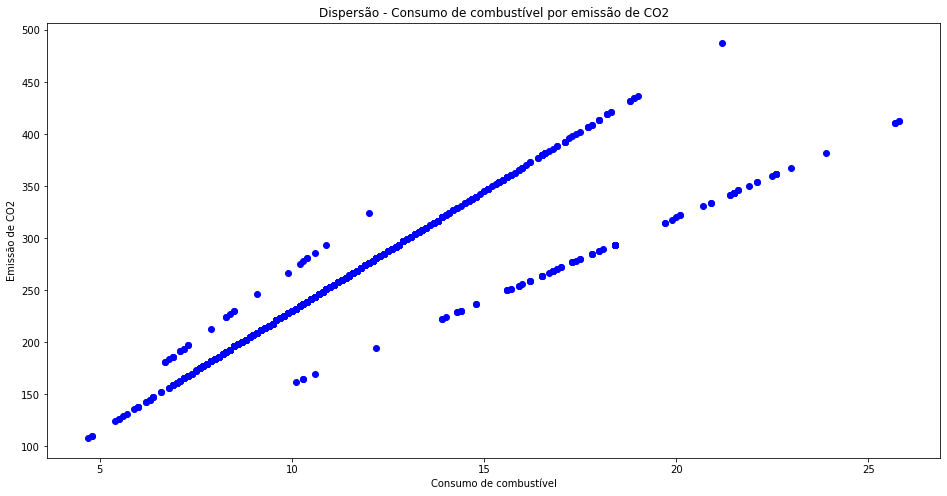

In [73]:
plt.scatter(
    dados_previsao['FUELCONSUMPTION_COMB'], 
    dados_previsao['CO2EMISSIONS'], 
    color = 'b'
)

configurar_plot(
    'Dispersão - Consumo de combustível por emissão de CO2',
    'Consumo de combustível',
    'Emissão de CO2',
    16,
    8
)

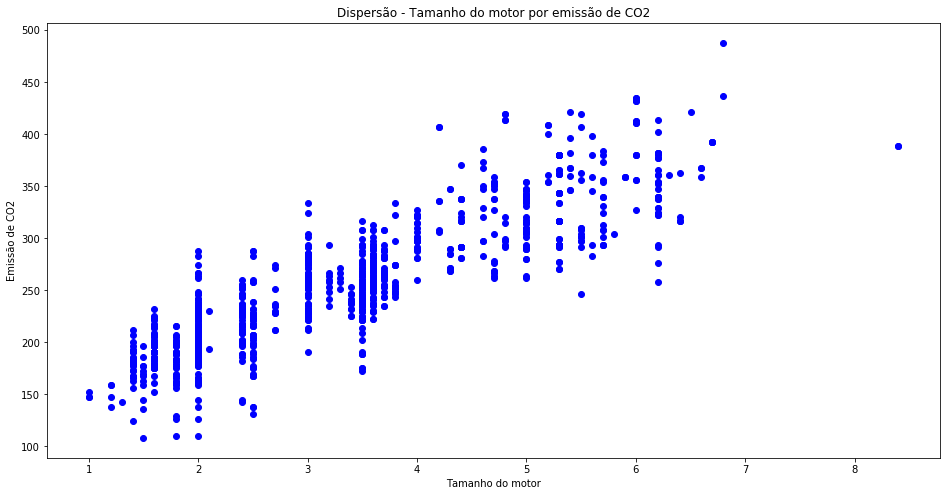

In [72]:
plt.scatter(
    dados_previsao['ENGINESIZE'], 
    dados_previsao['CO2EMISSIONS'],
    color = 'b'
)

configurar_plot(
    'Dispersão - Tamanho do motor por emissão de CO2',
    'Tamanho do motor', 'Emissão de CO2',
    16, 
    8
)

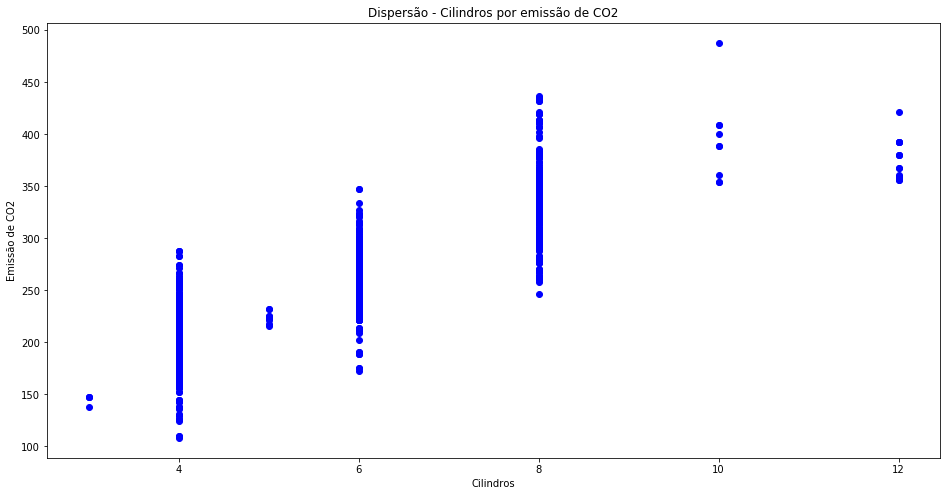

In [71]:
plt.scatter(dados_previsao['CYLINDERS'], dados_previsao['CO2EMISSIONS'], color = 'b')
configurar_plot(
    'Dispersão - Cilindros por emissão de CO2', 
    'Cilindros', 
    'Emissão de CO2',
    16, 
    8
)

### Criando um dataset de treino e de teste básico

In [66]:
array = np.random.rand(len(dados)) < 0.8
treino = dados_previsao[array]
teste = dados_previsao[~array]

In [67]:
treino.size

3432

In [68]:
teste.size

836

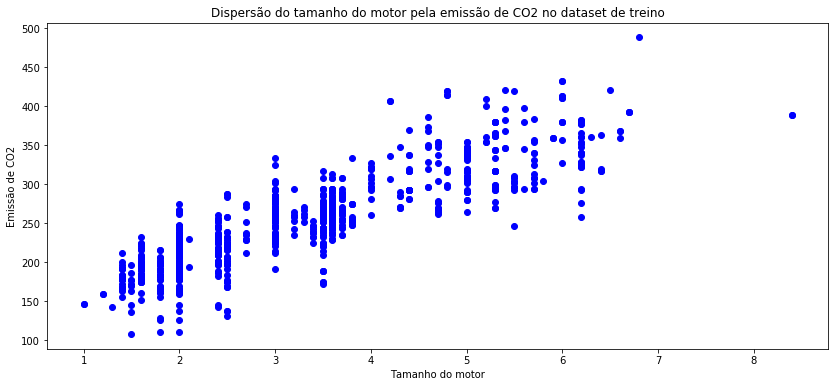

In [79]:
plt.scatter(
    treino['ENGINESIZE'], 
    treino['CO2EMISSIONS'],
    color='b'
)

configurar_plot(
    'Dispersão do tamanho do motor pela emissão de CO2 no dataset de treino', 
    'Tamanho do motor',
    'Emissão de CO2',
    14,
    6
)

### Criando o modelo utilizando a Scikit-Learn

In [143]:
regressao_linear = linear_model.LinearRegression()

treino_x = np.asanyarray(treino[['ENGINESIZE']])
treino_y = np.asanyarray(treino[['CO2EMISSIONS']])

regressao_linear.fit(treino_x, treino_y)

coeficiente = regressao_linear.coef_[0][0]
interceptor = regressao_linear.intercept_[0]

print('Coeficiente: {}'.format(coeficiente))
print('Interceptor: {}'.format(interceptor))

Coeficiente: 38.113609836138316
Interceptor: 128.39204908799175


#### Plotando a regressão linear simples: y = interceptor + coeficiente * x1

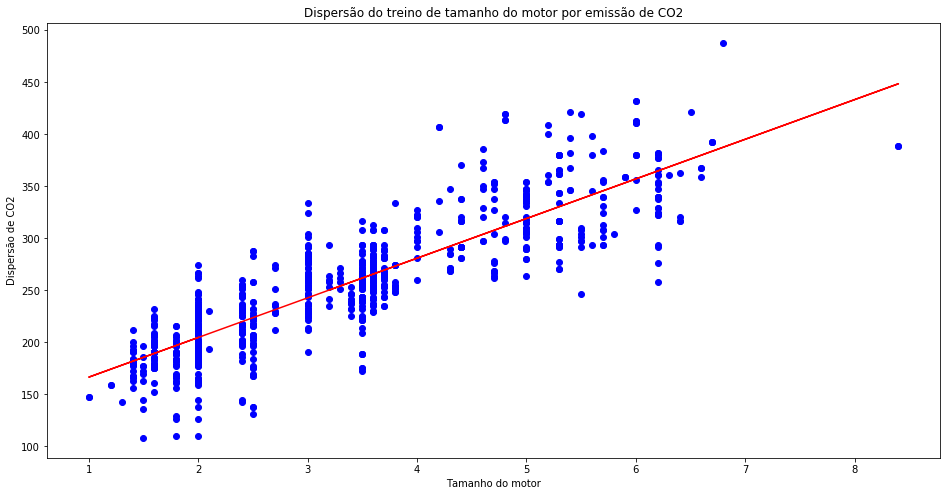

In [144]:
regressao_linear_calculo = interceptor + coeficiente * treino_x 

plt.scatter(treino['ENGINESIZE'], treino['CO2EMISSIONS'],  color='blue')
plt.plot(treino_x, regressao_linear_calculo, '-r')
configurar_plot(
    'Dispersão do treino de tamanho do motor por emissão de CO2',
    'Tamanho do motor',
    'Dispersão de CO2',
    16,
    8
)

### Avaliando o modelo criado e prevendo valores

In [145]:
# Agora, iremos pegar os datasets de teste.
# O teste de x será utilizado como previsão para o teste de y 
# Iremos comparar o teste y com o teste y de predições

teste_x = np.asanyarray(teste[['ENGINESIZE']])
teste_y = np.asanyarray(teste[['CO2EMISSIONS']])

teste_y_previsao = regressao_linear.predict(teste_x)

#### Comparando os resultados

In [146]:
# Iremos verificar o Erro Percentual Absoluto Médio, Erro Médio Quadrático e o teste R2-Score

print('Erro Percentual Absoluto Médio: {}'.format(str(np.mean(np.absolute(teste_y_previsao - teste_y)))))
print('Erro Médio Quadrático: {}'.format(str(np.mean((teste_y_previsao - teste_y) ** 2))))
print('Teste R2-Score: {}'.format(str(r2_score(teste_y_previsao, teste_y))))

Erro Percentual Absoluto Médio: 23.620347465222363
Erro Médio Quadrático: 881.1358329256193
Teste R2-Score: 0.6990729024197886
